In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Oi

In [42]:
# Read the CSV file
df = pd.read_csv("results.csv")
print(df.info())

df[' Average'] = df[' Total']/1000

# Drop rows where 'Size_eval' could not be determined
df.dropna(subset=['Size_eval'], inplace=True)
df[' Average'] = pd.to_numeric(df[' Average'].astype(str).str.strip(), errors='coerce')
df['Time_per_Byte'] = df[' Average'] / df['Size_eval']

# Sort by evaluated size for a cleaner plot
df.sort_values('Size_eval', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Size       17 non-null     object 
 1    Total     17 non-null     float64
 2   Size_eval  17 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 540.0+ bytes
None


In [43]:
tick_values = [
    64,
    1024,  # 1KB
    4 * 1024,  # 4KB
    64 * 1024,  # 64KB
    512 * 1024,  # 512KB
    1 * 1024 * 1024,  # 1MB
    4 * 1024 * 1024,  # 4MB
    16 * 1024 * 1024  # 16MB
]
tick_labels = [
    "64b",
    "1kb",
    "4kb",
    "64kb",
    "512kb",
    "1mb",
    "4mb",
    "16mb"
]

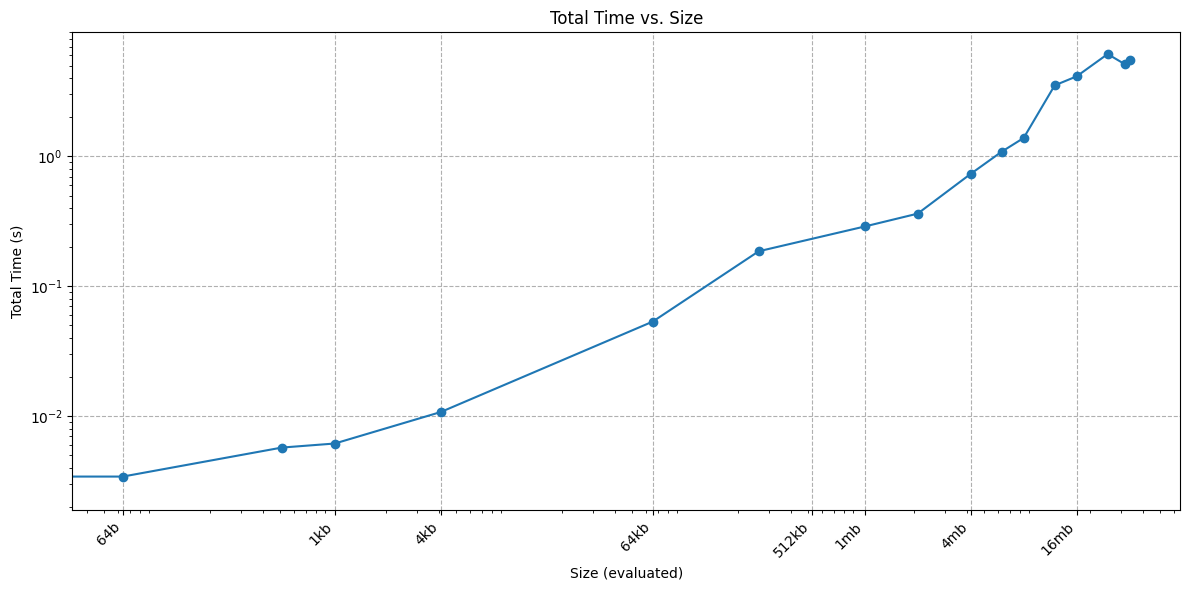

In [44]:
# Plot 1: Total time vs. Size
plt.figure(figsize=(12, 6))
plt.plot(df['Size_eval'], df[' Total'], marker='o', linestyle='-')
plt.title('Total Time vs. Size')
plt.xlabel('Size (evaluated)')
plt.ylabel('Total Time (s)')
plt.xscale('log') # Using log scale for x-axis due to large range in sizes
plt.yscale('log') # Using log scale for y-axis if total times also vary widely
plt.grid(True, which="major", ls="--")
plt.xticks(tick_values, tick_labels, rotation=45, ha="right") # Set custom x-ticks
plt.tight_layout()
plt.savefig("total_time_vs_size.png")
plt.show() # In Jupyter, plt.show() is often implicitly called, but good practice to keep

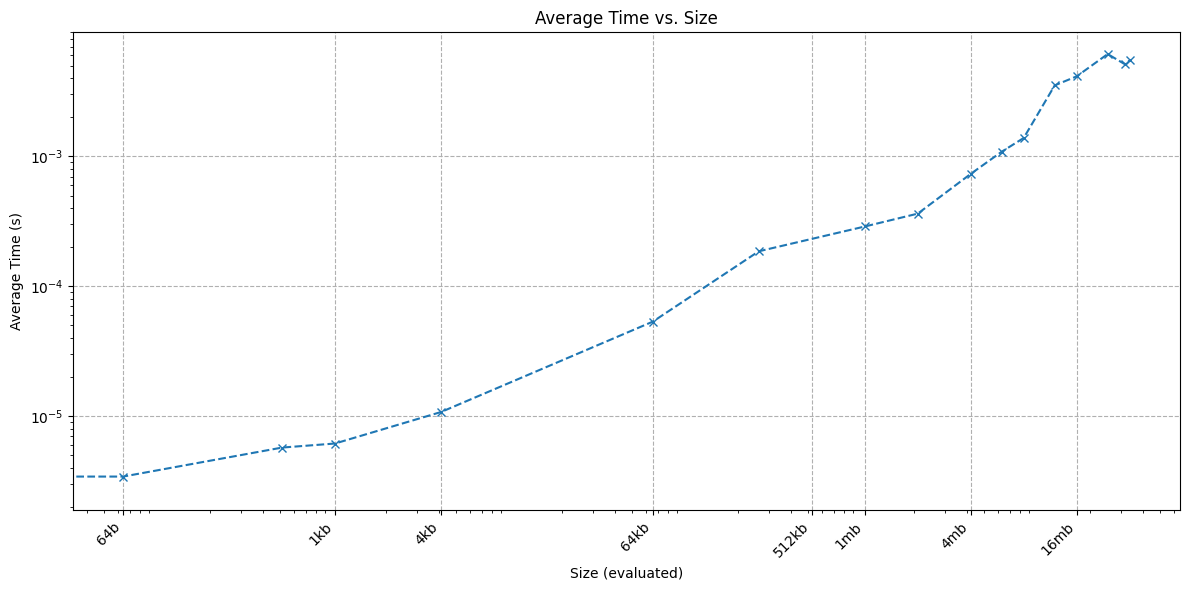

In [45]:
# Plot 2: Average time vs. Size
plt.figure(figsize=(12, 6))
plt.plot(df['Size_eval'], df[' Average'], marker='x', linestyle='--')
plt.title('Average Time vs. Size')
plt.xlabel('Size (evaluated)')
plt.ylabel('Average Time (s)')
plt.xscale('log') # Using log scale for x-axis
plt.yscale('log') # Using log scale for y-axis
plt.grid(True, which="major", ls="--")
plt.xticks(tick_values, tick_labels, rotation=45, ha="right") # Set custom x-ticks
plt.tight_layout()
plt.savefig("average_time_vs_size.png")
plt.show()

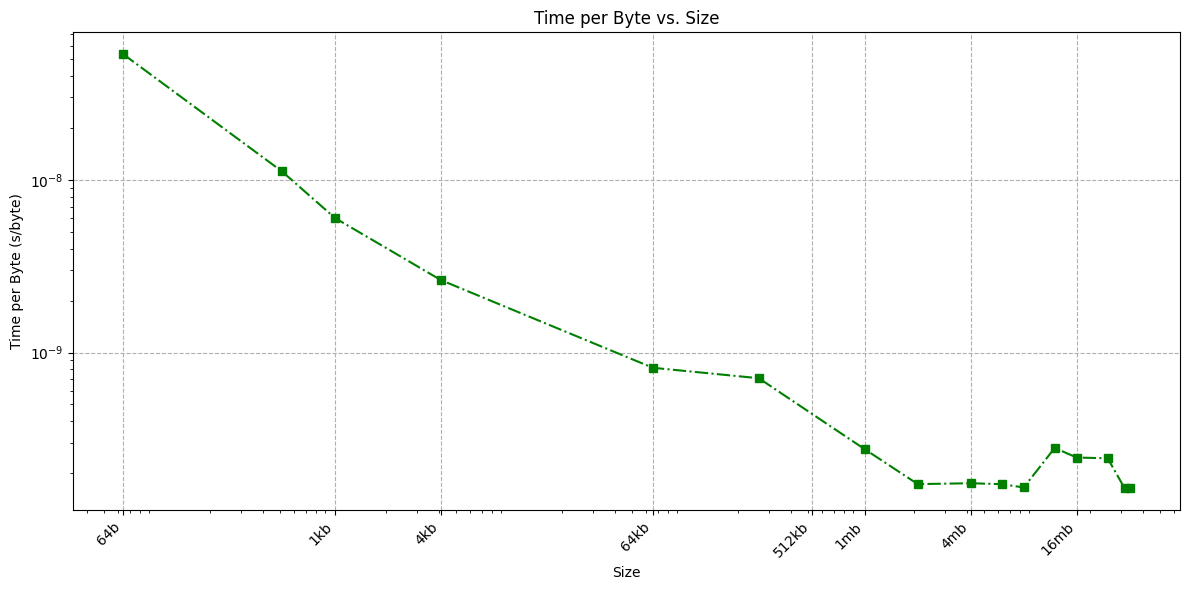

: 

In [ ]:
# Plot 3: Time per Byte vs. Size
plt.figure(figsize=(12, 6))
plt.plot(df['Size_eval'], df['Time_per_Byte'], marker='s', linestyle='-.', color='green')
plt.title('Time per Byte vs. Size')
plt.xlabel('Size')
plt.ylabel('Time per Byte (s/byte)')
plt.xscale('log') # Using log scale for x-axis
plt.yscale('log') # Using log scale for y-axis, as time per byte can also vary widely
plt.grid(True, which="major", ls="--") # Grid for both major and minor ticks
plt.xticks(tick_values, tick_labels, rotation=45, ha="right") # Set custom x-ticks
plt.tight_layout()
plt.savefig("time_per_byte_vs_size.png")
plt.show()

In [47]:
df.to_csv("results_processed.csv", index=False) 
print("Processed data saved to atv14/results_processed.csv")
print("Plots generated: total_time_vs_size.png, average_time_vs_size.png, and time_per_byte_vs_size.png")

Processed data saved to atv14/results_processed.csv
Plots generated: total_time_vs_size.png, average_time_vs_size.png, and time_per_byte_vs_size.png
